# Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
#load data
data = pd.read_csv('faa_data_subset.xlsx - FAA Wildlife Strikes.csv')

#check data
data.sample(10)

,Airport: Code,Airport: Name,Origin State,Origin State Code,Country,Aircraft: Type,Aircraft: Number of engines,Collision Date and Time,When: Time of day,When: Phase of flight,...,Days,Feet above ground,Miles from airport,Wildlife: Animal Category,Wildlife: Species Order,Wildlife: Species Group,Wildlife: Species,Wildlife: Species ID,Number of Strikes,Record ID
5149,KCRQ,MC CLELLAN-PALOMAR ARPT,California,CA,United States,Airplane,1.0,11/12/14 9:00,Day,Climb,...,NaN,30,0.0,Birds,"Caracaras, Falcons","Caracaras, Falcons",American kestrel,K5114,1,356318
18724,KOAK,METRO OAKLAND INTL,California,CA,United States,Airplane,2.0,3/23/15 11:45,Day,Approach,...,NaN,50,0.0,Birds,"Gulls, Terns, Sandpipers, Plovers, Skimmers","Sandpipers, Curlews, Phalaropes",Least sandpiper,N6024,1,358298
17158,KMIA,MIAMI INTL,Florida,FL,United States,Airplane,2.0,8/22/03 8:19,Day,Take-off run,...,NaN,0,0.0,Birds,Perching Birds,Sparrows,Sparrows,ZX3,1,217075
22828,KROA,ROANOKE REGNL ARPT/WOODRUM FIELD,Virginia,VA,United States,Airplane,2.0,3/15/12 13:28,Day,Landing Roll,...,NaN,0,0.0,Birds,"Gulls, Terns, Sandpipers, Plovers, Skimmers","Plovers, Lapwings",Killdeer,N5111,1,321030
18102,KMSP,MINNEAPOLIS-ST PAUL INTL/WOLD-CHAMBERLAIN ARPT,Minnesota,MN,United States,Airplane,2.0,4/30/13 16:15,Day,Approach,...,NaN,"4,000",8.0,Birds,Perching Birds,Kinglets,Ruby-crowned kinglet,Z9002,1,332669
7158,KDFW,DALLAS/FORT WORTH INTL ARPT,Texas,TX,United States,Airplane,2.0,7/1/10 8:00,Day,Landing Roll,...,NaN,0,0.0,Birds,Pigeons and Doves,Pigeons,Rock pigeon,O2111,1,303096
24902,KSHV,SHREVEPORT REGIONAL,Louisiana,LA,United States,Airplane,2.0,7/3/08 6:10,Day,Take-off run,...,NaN,0,0.0,Birds,Pigeons and Doves,Doves,Mourning dove,O2205,1,250108
2811,KBOS,GENERAL EDWARD LAWRENCE LOGAN INTL ARPT,Massachusetts,MA,United States,Airplane,2.0,11/18/10 8:30,Day,Approach,...,NaN,100,NaN,Birds,Perching Birds,Buntings,Snow bunting,ZX202,1,309096
28053,KVLD,VALDOSTA REGIONAL,Georgia,GA,United States,NaN,NaN,6/11/13 11:05,NaN,Landing,...,NaN,700,NaN,Birds,"Hawks, Kites, Eagles, Ospreys, Vultures",Osprey,Osprey,K2001,1,17141
19438,KOQU,QUONSET STATE ARPT,Rhode Island,RI,United States,Airplane,2.0,7/8/11 13:00,Day,Landing Roll,...,NaN,0,0.0,Birds,Perching Birds,Swallows and Martins,Barn swallow,YI005,1,313975


In [3]:
#make copy of data for exploration and manipulation
my_copy = data.copy()

# Cleaning and EDA

## nulls, duplicates, data types, size

In [4]:
#check duplicates
my_dups = my_copy.duplicated().sum()
my_dups

0

In [6]:
#check nulls 
my_nulls = my_copy.isna().sum()
my_nulls

Airport: Code                                     0
Airport: Name                                     0
Origin State                                      0
Origin State Code                                 0
Country                                           0
Aircraft: Type                                  831
Aircraft: Number of engines                    2380
Collision Date and Time                           0
When: Time of day                               643
When: Phase of flight                           406
Effect: Amount of damage (detailed)           25187
Effect: Impact to flight                      25265
Effect: Indicated Damage                          0
Cost: Aircraft time out of service (hours)    25369
Cost: Total $                                     0
Days                                          25369
Feet above ground                              3426
Miles from airport                             8491
Wildlife: Animal Category                         0
Wildlife: Sp

In [9]:
#check data types and size of file
my_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28298 entries, 0 to 28297
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Airport: Code                               28298 non-null  object 
 1   Airport: Name                               28298 non-null  object 
 2   Origin State                                28298 non-null  object 
 3   Origin State Code                           28298 non-null  object 
 4   Country                                     28298 non-null  object 
 5   Aircraft: Type                              27467 non-null  object 
 6   Aircraft: Number of engines                 25918 non-null  float64
 7   Collision Date and Time                     28298 non-null  object 
 8   When: Time of day                           27655 non-null  object 
 9   When: Phase of flight                       27892 non-null  object 
 10  Effect: Am

Lots of nulls in some categories

In [10]:
#unique values per feature
my_copy.nunique()

Airport: Code                                   771
Airport: Name                                   771
Origin State                                     49
Origin State Code                                49
Country                                           1
Aircraft: Type                                    2
Aircraft: Number of engines                       4
Collision Date and Time                       27915
When: Time of day                                 4
When: Phase of flight                            11
Effect: Amount of damage (detailed)               4
Effect: Impact to flight                          4
Effect: Indicated Damage                          2
Cost: Aircraft time out of service (hours)      189
Cost: Total $                                  1097
Days                                            189
Feet above ground                               215
Miles from airport                               62
Wildlife: Animal Category                         4
Wildlife: Sp

In [7]:
my_nulls

Airport: Code                                     0
Airport: Name                                     0
Origin State                                      0
Origin State Code                                 0
Country                                           0
Aircraft: Type                                  831
Aircraft: Number of engines                    2380
Collision Date and Time                           0
When: Time of day                               643
When: Phase of flight                           406
Effect: Amount of damage (detailed)           25187
Effect: Impact to flight                      25265
Effect: Indicated Damage                          0
Cost: Aircraft time out of service (hours)    25369
Cost: Total $                                     0
Days                                          25369
Feet above ground                              3426
Miles from airport                             8491
Wildlife: Animal Category                         0
Wildlife: Sp

Before I move onto EDA, I need to deal with the nulls. 

Features with too many nulls will be ignored:
- Effect: Amount of damage (detailed)
- Effect: Impact to flight

Given Cost (hours) and Days have equal number of nulls it may be applicable to say these nulls are 0's, but they are strong candidate to be ignored and will likely be ignored

The rows with the other nulls will be dropped - specifically Aircraft type, time of day, and phase of flight


# **Reseach Question:** Predict the cost of wildlife collision in Dollars to start and then hours/days

# Data Cleaning

In [8]:
my_copy.columns

Index(['Airport: Code', 'Airport: Name', 'Origin State', 'Origin State Code',
       'Country', 'Aircraft: Type', 'Aircraft: Number of engines',
       'Collision Date and Time', 'When: Time of day', 'When: Phase of flight',
       'Effect: Amount of damage (detailed)', 'Effect: Impact to flight',
       'Effect: Indicated Damage',
       'Cost: Aircraft time out of service (hours)', 'Cost: Total $', 'Days',
       'Feet above ground', 'Miles from airport', 'Wildlife: Animal Category',
       'Wildlife: Species Order', 'Wildlife: Species Group',
       'Wildlife: Species', 'Wildlife: Species ID', 'Number of Strikes',
       'Record ID'],
      dtype='object')

In [15]:
# Select Relevant features
my_df = my_copy[['Airport: Code', 'Origin State', 'Aircraft: Type', 'Aircraft: Number of engines', 'Collision Date and Time',
            'When: Time of day', 'When: Phase of flight', 'Effect: Indicated Damage',
            'Cost: Total $', 'Wildlife: Animal Category']]

my_df.sample(10)

,Airport: Code,Origin State,Aircraft: Type,Aircraft: Number of engines,Collision Date and Time,When: Time of day,When: Phase of flight,Effect: Indicated Damage,Cost: Total $,Wildlife: Animal Category
17436,KMKE,Wisconsin,Airplane,NaN,7/13/04 0:30,Day,Climb,No damage,0,Birds
5764,KDAY,Ohio,Airplane,2.0,8/12/14 7:08,Day,Take-off run,No damage,0,Birds
937,KATL,Georgia,Airplane,2.0,11/29/09 0:34,Day,Landing Roll,Caused damage,0,Birds
21903,KPNS,Florida,Airplane,2.0,6/24/12 5:40,Dawn,Take-off run,No damage,0,Birds
16890,KMFE,Texas,Airplane,2.0,7/9/13 20:15,Dusk,Approach,No damage,0,Birds
7847,KDSM,Iowa,Airplane,2.0,2/6/08 15:53,Day,Climb,No damage,0,Birds
7725,KDLH,Minnesota,Airplane,2.0,9/14/14 7:12,Day,Take-off run,No damage,0,Birds
2290,KBMI,Illinois,Airplane,2.0,6/5/07 6:30,Dawn,Take-off run,No damage,0,Birds
5168,KCRW,West Virginia,Airplane,NaN,8/6/01 13:40,Day,Approach,No damage,0,Birds
27322,KTEB,New Jersey,Airplane,3.0,4/11/01 7:10,Day,Take-off run,No damage,0,Birds


In [ ]:
#drop rows where there are nulls
my_df = my_df.dropna()

In [21]:
#get number of original rows and new df rows
original_rows = my_copy.shape[0]
new_rows = my_df.shape[0]

#calc percentage of rows lost
((new_rows / original_rows) - 1) * 100

#dropping the nulls resulted in about a 10.2% loss of data pretty good all things considered

-10.184465333239102

# EDA

In [41]:
# get counts
def get_counts(dataframe, feature):
    counts = dataframe[feature].value_counts()
    return counts


#plot counts
def plot_counts(dataframe, feature, size=tuple):
    counts = get_counts(dataframe, feature)
    fig = plt.figure(figsize=size)
    plt.bar(counts.index, counts.values)
    plt.title(f"{feature} Counts")
    plt.xlabel(feature)
    plt.ylabel("Counts")
    plt.xticks(rotation=90)
    plt.show()


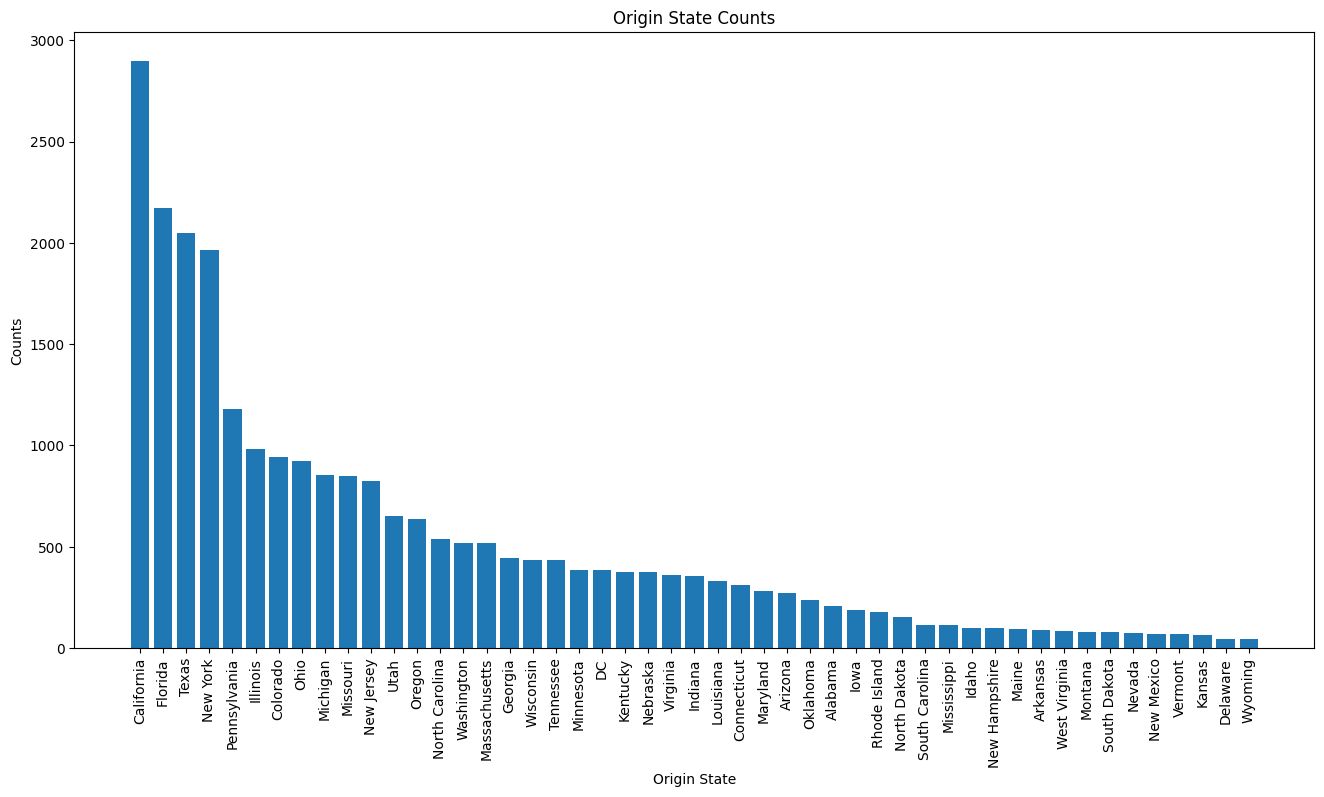

In [42]:
#collisions per state
plot_counts(my_df, 'Origin State', (16, 8))

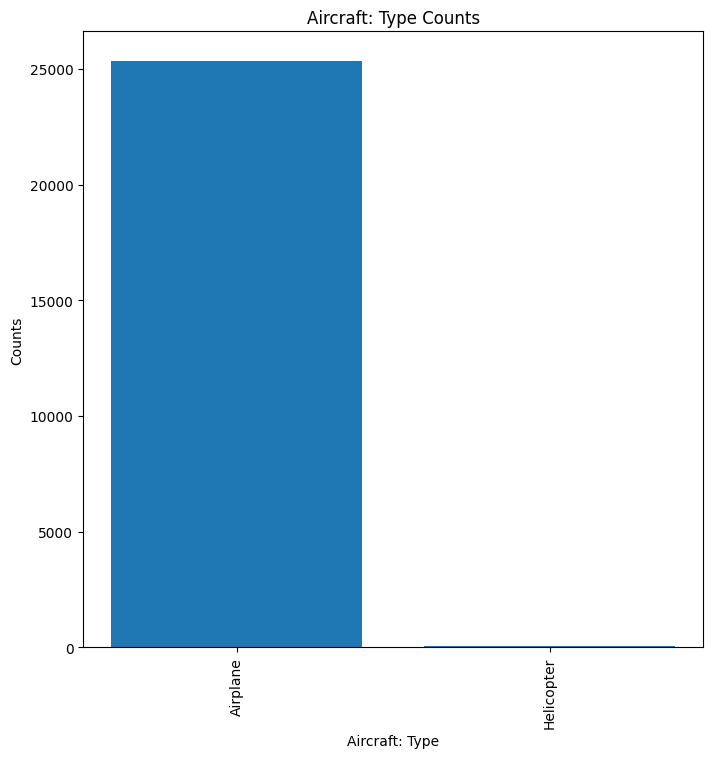

In [44]:
#Collisions per aircraft type
plot_counts(my_df, 'Aircraft: Type', (8, 8))

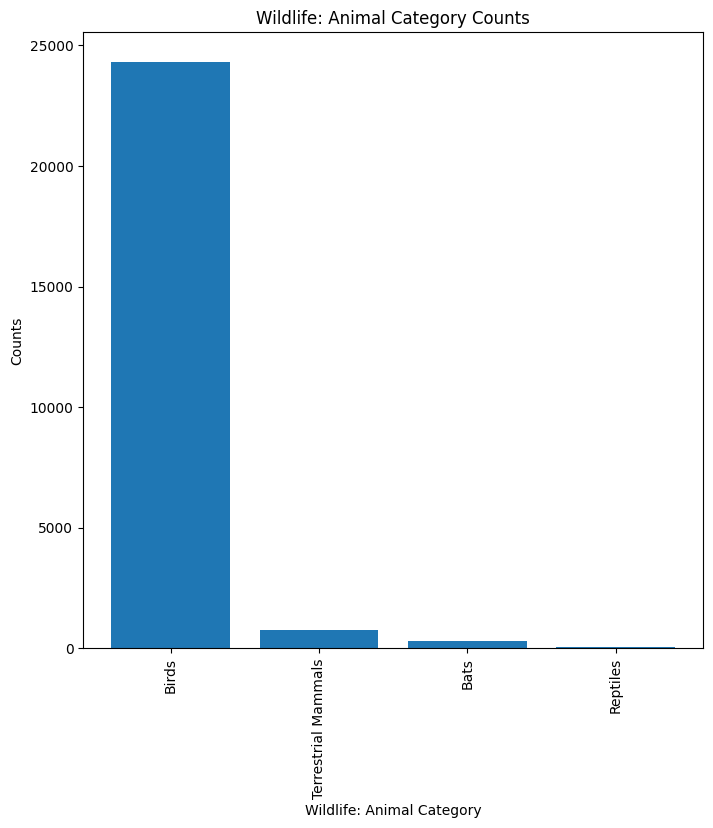

In [46]:
#collisions per animal category
plot_counts(my_df, 'Wildlife: Animal Category', (8, 8))

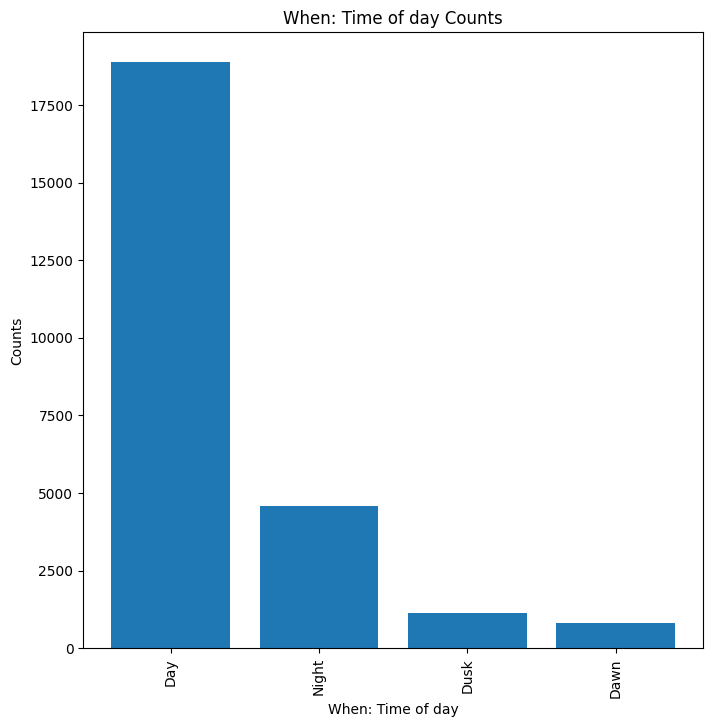

In [48]:
#collisions - Time of day
plot_counts(my_df, 'When: Time of day', (8,8))

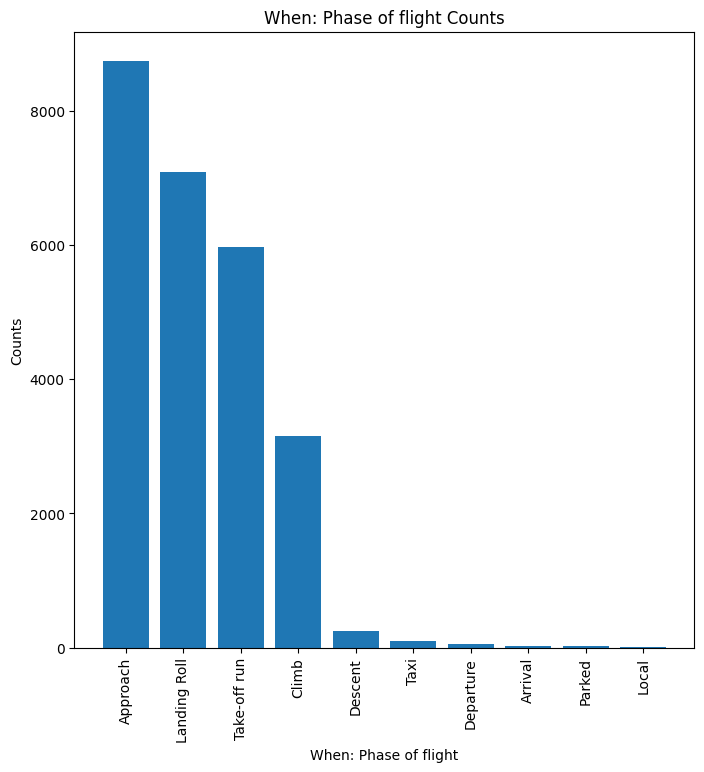

In [51]:
#collisions - Phase of flight
plot_counts(my_df, 'When: Phase of flight', (8, 8))

In [54]:
#convert collision to datetiem
my_df['Collision Date and Time'] = pd.to_datetime(my_df['Collision Date and Time'])

#make columns for year and month
my_df['Year'] = my_df['Collision Date and Time'].dt.year
my_df['Month'] = my_df['Collision Date and Time'].dt.month_name()

#check
my_df.head()

,Airport: Code,Origin State,Aircraft: Type,Aircraft: Number of engines,Collision Date and Time,When: Time of day,When: Phase of flight,Effect: Indicated Damage,Cost: Total $,Wildlife: Animal Category,Year,Month
2,KABE,Pennsylvania,Airplane,2.0,2009-04-23 09:22:00,Day,Take-off run,Caused damage,"171,132",Birds,2009,April
3,KABE,Pennsylvania,Airplane,2.0,2014-04-13 22:00:00,Night,Approach,No damage,600,Birds,2014,April
4,KABE,Pennsylvania,Airplane,2.0,2009-03-31 18:15:00,Day,Approach,Caused damage,"188,245",Birds,2009,March
5,KABE,Pennsylvania,Airplane,2.0,2002-03-19 09:09:00,Day,Take-off run,No damage,0,Birds,2002,March
6,KABE,Pennsylvania,Airplane,3.0,2014-04-10 18:15:00,Day,Take-off run,No damage,0,Birds,2014,April


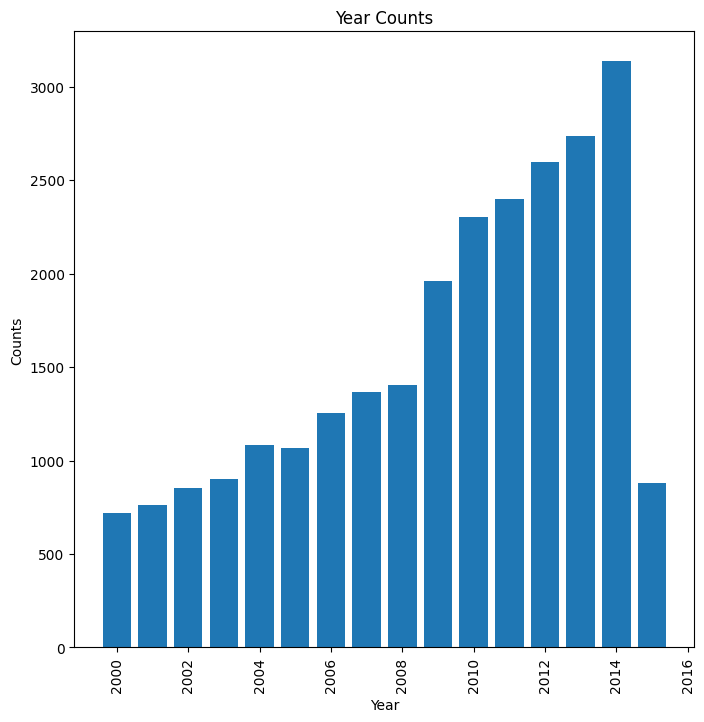

In [55]:
#Collisions per year
plot_counts(my_df, 'Year', (8, 8))


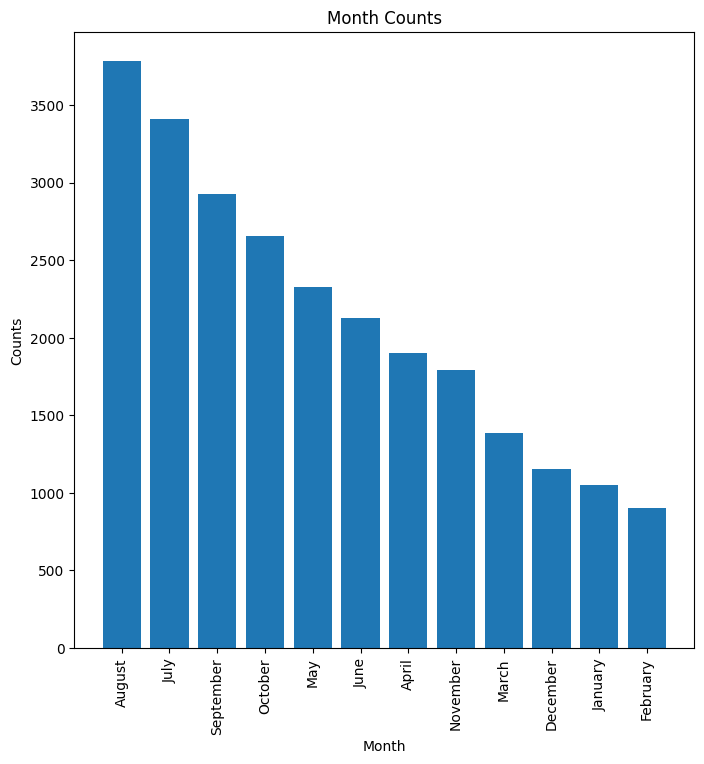

In [57]:
# Collisions per Month
plot_counts(my_df, 'Month', (8, 8))

In [ ]:
#collisions per month per year

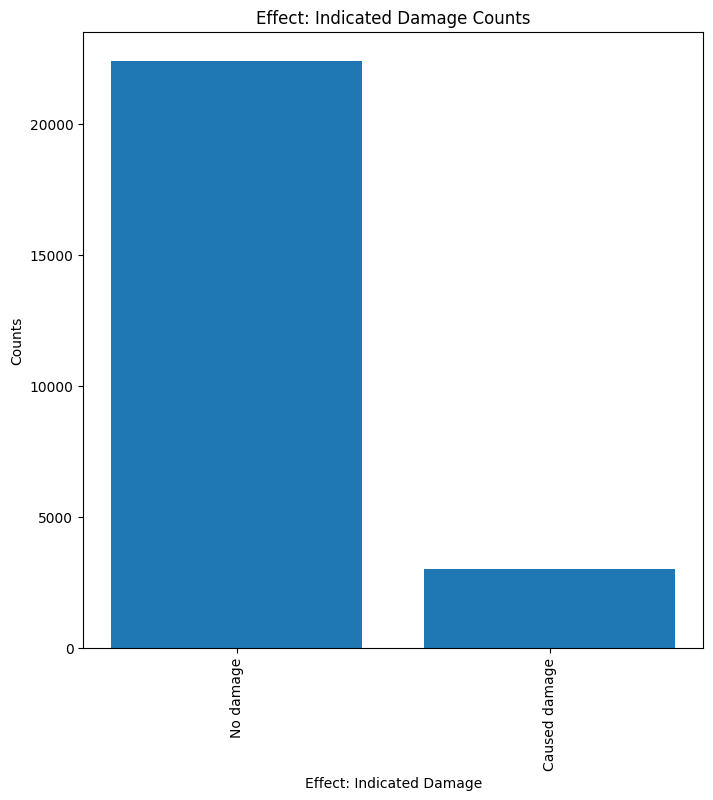

In [58]:
#damage causing collisions
plot_counts(my_df, 'Effect: Indicated Damage', (8, 8))